In [1]:
import pickle 
from IPython.display import display
import matplotlib as plt
import seaborn as sns

from capstone_project import preprocessor as pre

%matplotlib inline

In [2]:
def load_pickle(filename):
    with open (filename, "rb") as handle:
        return pickle.load(handle)

In [25]:
file_directory = "../output/data/"
prefix = ""

train_data = load_pickle(file_directory+prefix+"train_data.pkl") 

In [7]:
train_data = train_data[:100]

In [5]:
display(train_data.head(1))

,id,qid1,qid2,question1,question2,is_duplicate,q1_tokens,q2_tokens
355802,355802,696825,696826,Which are the best songs of Enrique Iglesias?,Which is the best song of Enrique iglesias?,1,"[best, song, enrique, iglesias]","[best, song, enrique, iglesias]"


In [8]:
feature_engineering = pre.FeatureTransformer()

feature_df = feature_engineering.transform(train_data)

,q1_length,q2_length,diff_length,q1_n_words,q2_n_words,q1_len_word_ratio,q2_len_word_ratio,word_share,word2vec_cosine_distance,word2vec_cityblock_distance,word2vec_jaccard_distance,word2vec_canberra_distance,word2vec_minkowski_distance,word2vec_euclidean_distance,word2vec_braycurtis_distance,word2vec_skew_q1,word2vec_skew_q2,word2vec_kurtosis_q1,word2vec_kurtosis_q2
218104,33,31,2,3,3,11.0,10.333333,0.333333,0.380901,12.206575,1.0,162.174748,0.389519,0.872813,0.481158,0.038294,0.033593,-0.163697,-0.135468


,q1_length,q2_length,diff_length,q1_n_words,q2_n_words,q1_len_word_ratio,q2_len_word_ratio,word_share,word2vec_cosine_distance,word2vec_cityblock_distance,word2vec_jaccard_distance,word2vec_canberra_distance,word2vec_minkowski_distance,word2vec_euclidean_distance,word2vec_braycurtis_distance,word2vec_skew_q1,word2vec_skew_q2,word2vec_kurtosis_q1,word2vec_kurtosis_q2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,60.590000,60.080000,0.510000,5.540000,5.610000,11.634583,11.699054,0.472139,0.229801,8.364916,0.910000,123.135852,0.274105,0.606305,0.331158,0.005498,0.028511,-0.068024,-0.083300
std,28.432481,29.925051,29.719053,2.962459,3.329983,2.898072,3.930610,0.281274,0.196054,4.204614,0.287623,48.686987,0.137870,0.304838,0.187746,0.143023,0.145677,0.282006,0.253901
min,22.000000,16.000000,-123.000000,1.000000,1.000000,7.545455,5.937500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.307428,-0.371392,-0.577687,-0.554517
25%,40.750000,41.000000,-14.000000,4.000000,3.000000,9.575000,9.475000,0.265625,0.103315,6.281791,1.000000,110.935161,0.205584,0.454561,0.235307,-0.100264,-0.040271,-0.291450,-0.226843
50%,50.000000,54.000000,0.500000,5.000000,5.000000,11.000000,10.775000,0.448529,0.183522,8.400944,1.000000,132.437787,0.275521,0.605840,0.324291,-0.001631,0.026452,-0.089998,-0.107144
75%,77.500000,70.500000,11.250000,7.000000,7.000000,12.831731,13.297619,0.708333,0.294468,10.546032,1.000000,149.144599,0.351763,0.767405,0.411945,0.115656,0.112167,0.090649,0.023988
max,168.000000,200.000000,124.000000,18.000000,18.000000,22.000000,35.000000,1.000000,0.891975,18.711506,1.000000,209.024286,0.598560,1.335646,0.874271,0.374144,0.473292,0.708531,0.831075


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0f55ac150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa1049d2f90>]], dtype=object)

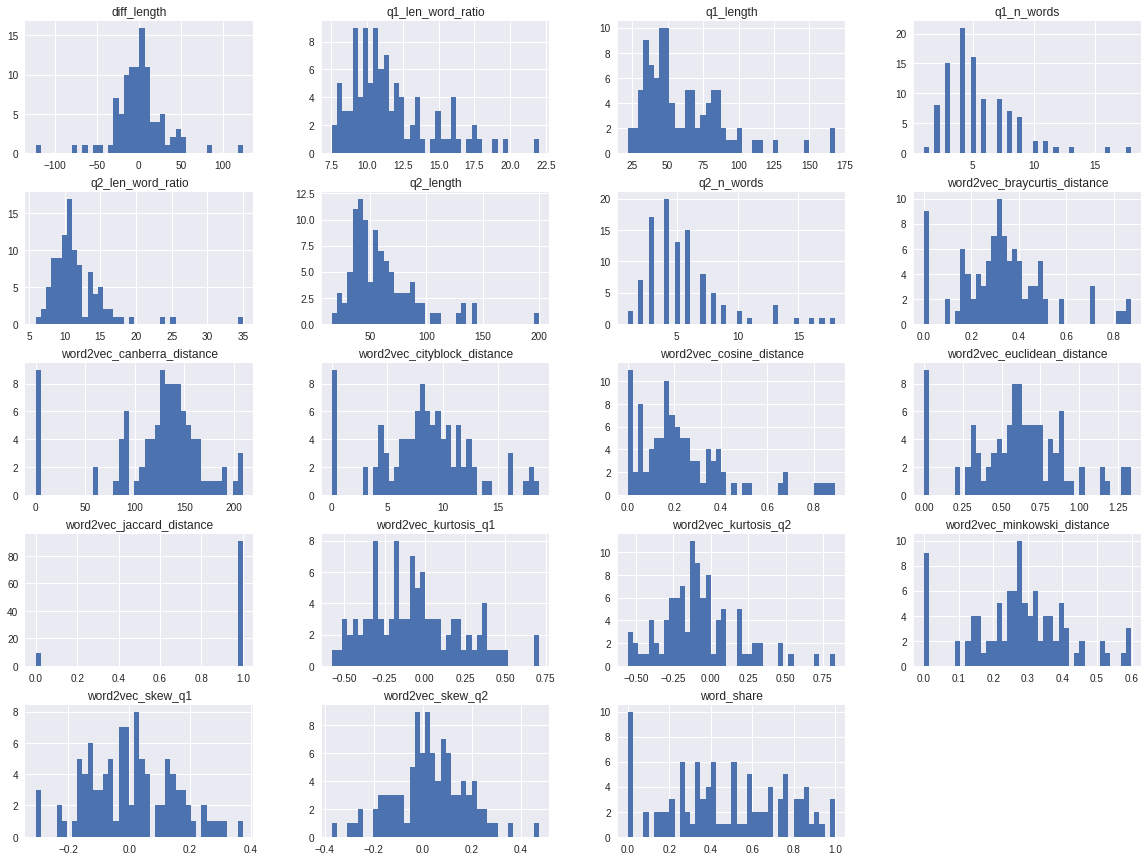

In [9]:
display(feature_df.head(1))
display(feature_df.describe())

feature_df.hist(bins=40, figsize=[20,15])

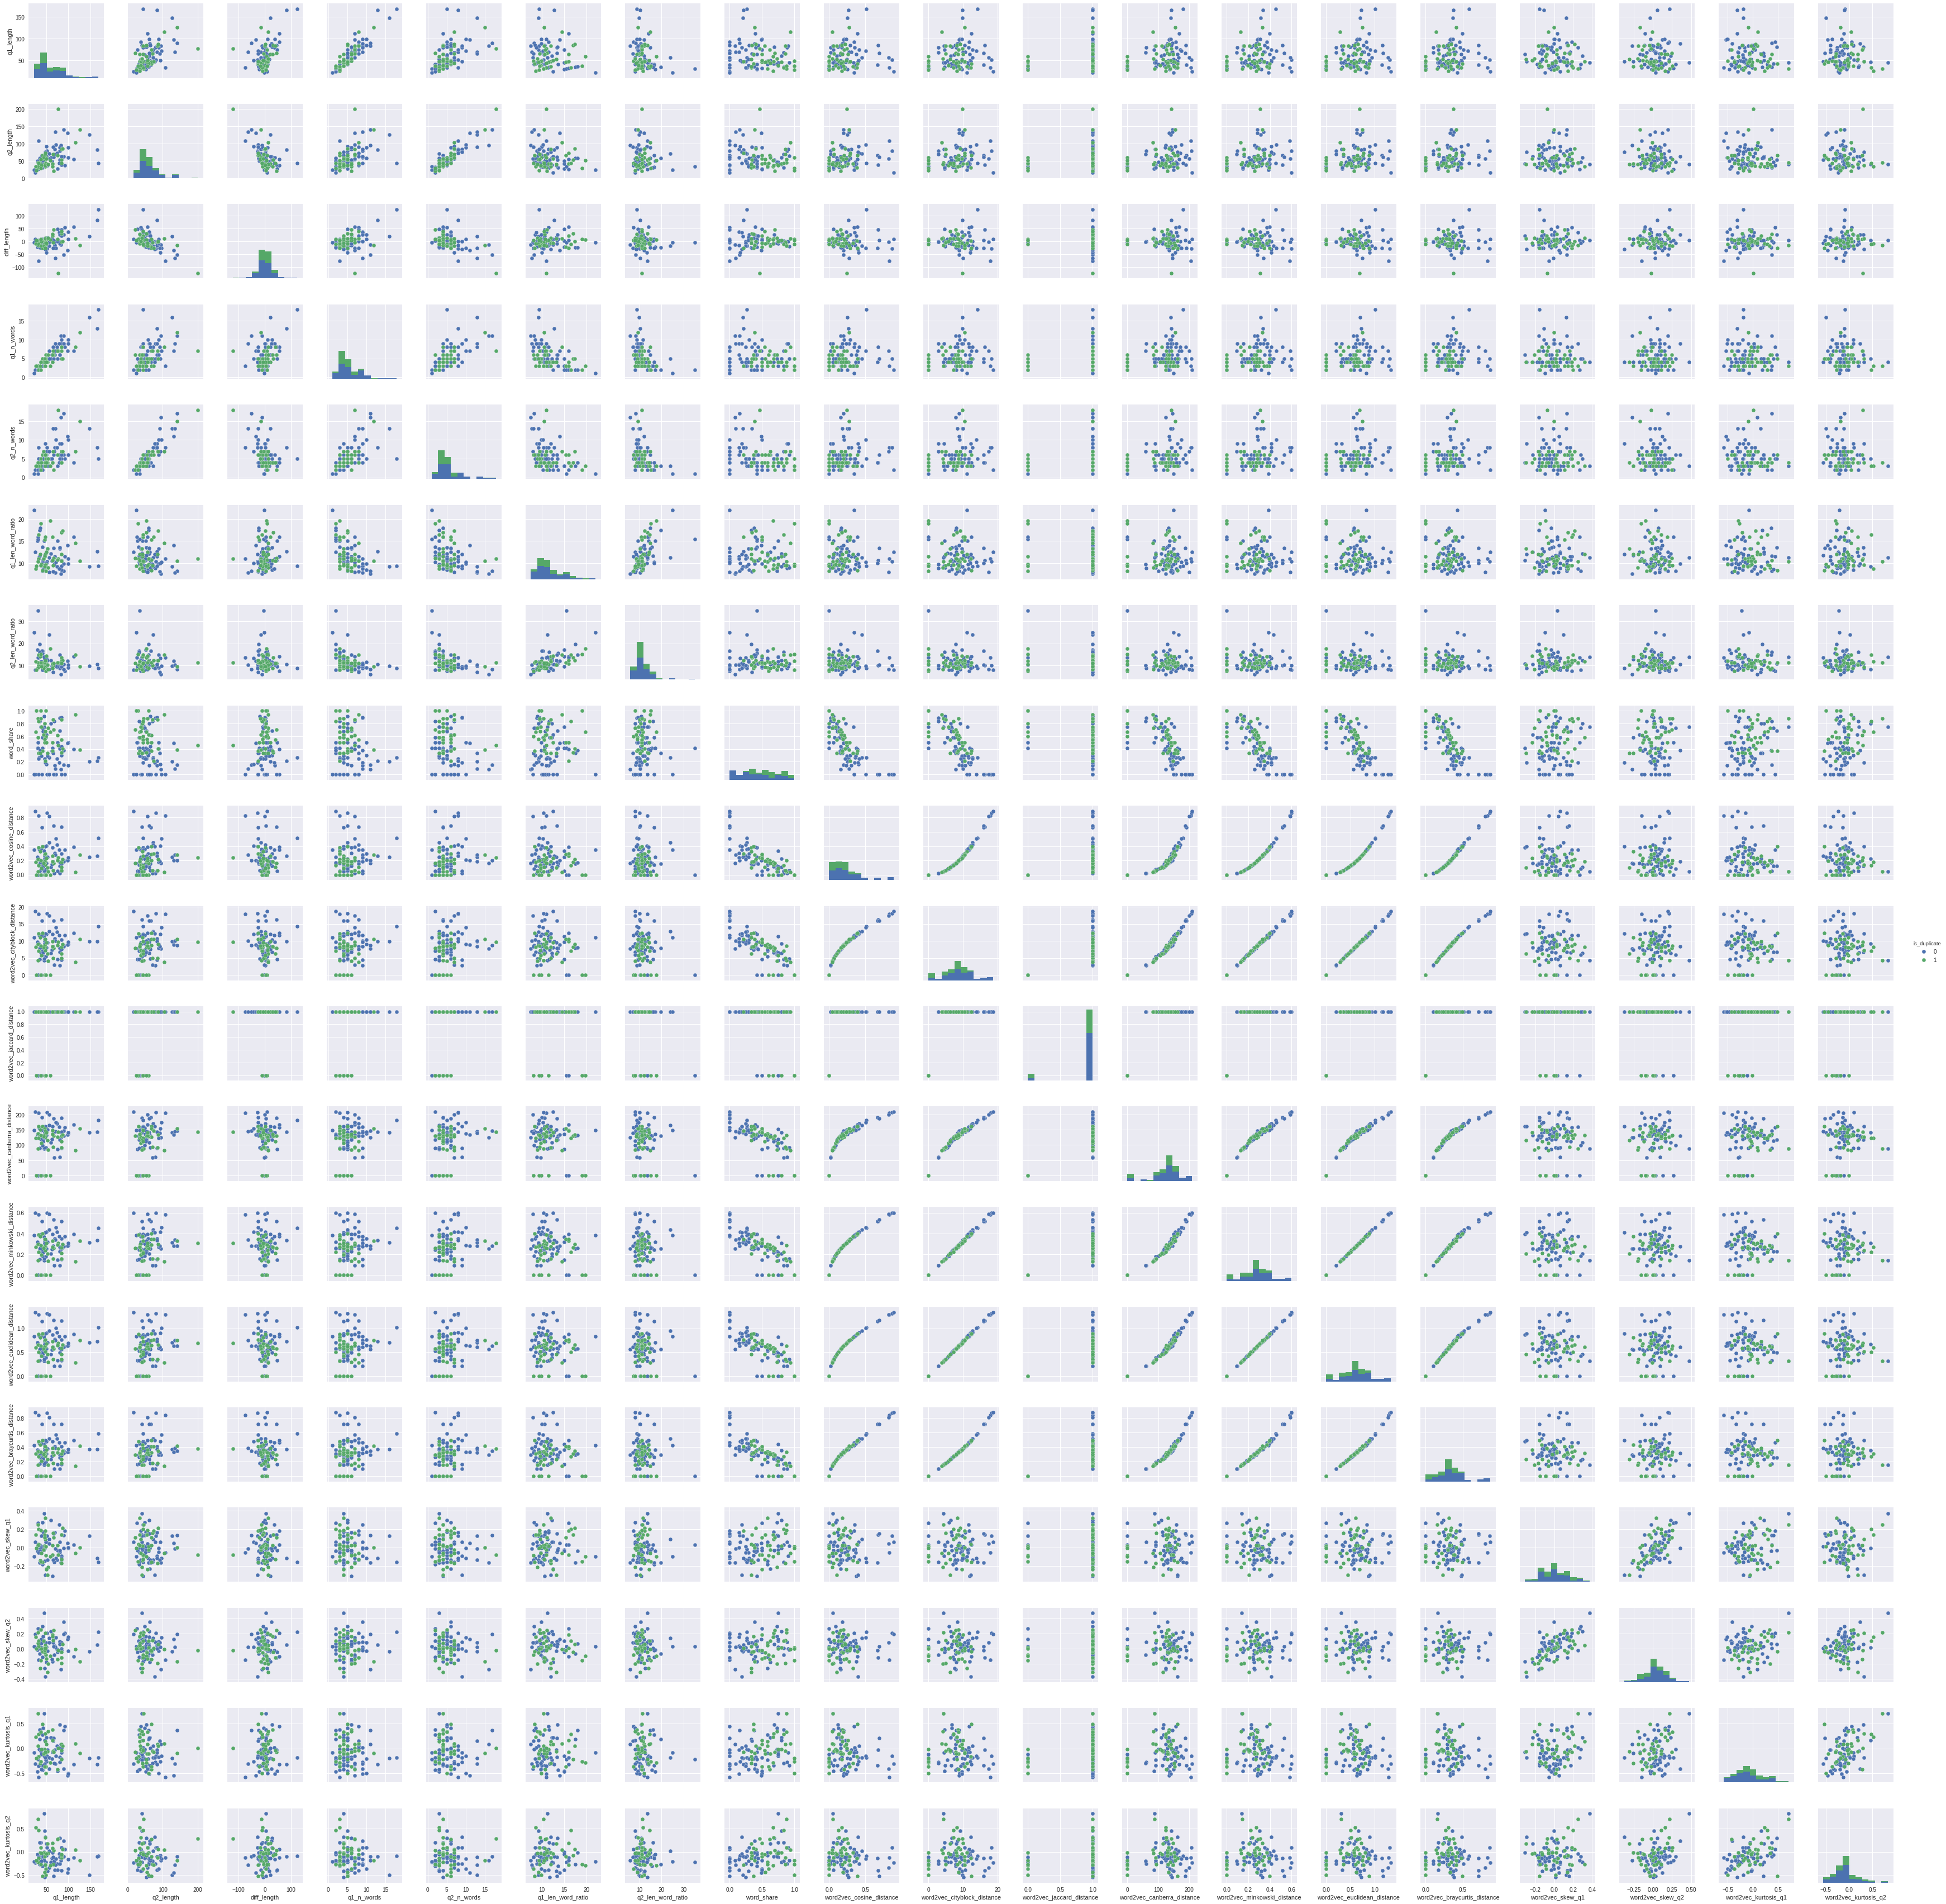

In [8]:
import pandas as pd
from scipy import stats
# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(feature_df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
feature_df["is_duplicate"] = train_data["is_duplicate"]

g = sns.pairplot(feature_df, hue="is_duplicate", vars=feature_df.columns.values[:-1])

In [1]:
#print(feature_df.corr()) 

skewness = stats.skew(feature_df, axis=0)
k2_vals, p_vals = stats.skewtest(feature_df, axis=0)
print("\nSkewness: {}").format(skewness)
print("Normaltest p-values: {}").format(p_vals)

NameError: name 'stats' is not defined

In [10]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
train_features = mms.fit_transform(feature_df)

In [8]:
import gensim

file_directory = "../output/data/"
prefix = ""

#train_data = load_pickle(file_directory+prefix+"train_data.pkl") 
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin.gz', binary=True)

#train_data.loc[60391]

In [37]:
train_data[train_data["q1_tokens"].apply(len) == 0]

,id,qid1,qid2,question1,question2,is_duplicate,q1_tokens,q2_tokens
252082,252082,496271,496272,Where are you from?,Where are you?,0,[],[]
306059,306059,600923,600924,Where are him from?,What ethnicity do I look like?,0,[],"[ethnicity, look, like]"
296132,296132,581700,581701,What is #?,What is a good company to study digital social...,0,[],"[good, company, study, digital, social, medium..."
100429,100429,199283,199284,Are there any?,Are there hadith in which Prophet Muhammad(SAW...,0,[],"[hadith, prophet, muhammad(saw, show, compassi..."
179338,179338,354242,354243,What should I do?,I am going to turn 19 soon. What advice do you...,0,[],"[go, turn, 19, soon, advice]"
198943,198943,392619,392620,What is this?,o,0,[],[]
63726,63726,126727,126728,What?,What is the average processing time for a spou...,0,[],"[average, processing, time, spouse, sponsorshi..."
366015,366015,716423,716424,What should I do?,Depressed and extremely pessimistic. How to st...,0,[],"[depressed, extremely, pessimistic, start, new..."
208830,208830,411940,411941,Can?,Can I insure a vehicle and receive a license p...,0,[],"[insure, vehicle, receive, license, plate, wit..."
365848,365848,716099,716100,What is it that you are doing and why?,What are you doing?,0,[],[]


In [51]:
import numpy as np

def question_to_vector(question):
    """Takes a list words as input and returns the word2vec matrix for these words.
    The word2vec model was pretrained by google."""
    vectors = []

    for w in question:
        try:
            vectors.append(word2vec_model[w])
        except KeyError:
            continue  # Ignore words that are not in the vocabulary

    if len(vectors) == 0:
        return np.zeros((1,300))

    vectors = np.array(vectors)
    return vectors

def sum_vectors(vectors):
    vector = vectors.sum(axis=0)
    return vector / np.sqrt((vector ** 2).sum())

In [52]:
x = train_data.loc[252082]["q2_tokens"]
test = question_to_vector(x)

In [53]:
print test, len(test)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [55]:
x = train_data.iloc[20]["q2_tokens"]
test = question_to_vector(x)
print len(test)

3


In [66]:
train_data["q1_vecsum"] = train_data["q1_tokens"].apply(question_to_vector).apply(sum_vectors)
train_data["q2_vecsum"] = train_data["q2_tokens"].apply(question_to_vector).apply(sum_vectors)

#print train_data["q1_vecsum"].iloc[0]

In [32]:
import numpy as np

np.zeros((1,5)).sum(axis=0)

array([ 0.,  0.,  0.,  0.,  0.])

In [6]:
transformer = pre.Word2vecTransformer(model_file='../data/GoogleNews-vectors-negative300.bin.gz')

In [10]:
test = transformer.transform(train_data)
print test.iloc[0]

[[ -1.26953125e-01   2.19726562e-02   2.87109375e-01   1.53320312e-01
    1.27929688e-01   3.27148438e-02  -1.15722656e-01  -2.95410156e-02
    1.53320312e-01   1.12915039e-02   1.39648438e-01  -8.69140625e-02
    2.57812500e-01   7.37304688e-02  -1.89208984e-02   1.25000000e-01
    9.08203125e-02  -1.55639648e-03  -3.19824219e-02  -1.45507812e-01
    4.76074219e-02   1.73828125e-01  -1.46484375e-01   6.01196289e-03
    3.02734375e-02   4.07714844e-02  -6.64062500e-02   1.84570312e-01
    9.71679688e-02  -1.04980469e-01   2.49023438e-02   5.63964844e-02
    1.65039062e-01   9.08203125e-02   1.85546875e-01   2.25585938e-01
   -3.97949219e-02  -1.67968750e-01  -6.93359375e-02   1.96533203e-02
    2.43164062e-01  -3.97949219e-02  -1.52343750e-01   5.34667969e-02
   -6.00585938e-02   2.94921875e-01   1.81640625e-01  -4.63867188e-02
    1.67968750e-01   1.01562500e-01   9.08203125e-02   3.18359375e-01
   -6.22558594e-02   8.39843750e-02  -1.66015625e-01  -2.09960938e-02
   -1.90429688e-02  

In [89]:
print train_data.loc[52890]
print np.isfinite(train_data.loc[52890]["q1_vecsum"]).all()
print np.isfinite(train_data.loc[52890]["q2_vecsum"]).all()

id                                                          52890
qid1                                                       105250
qid2                                                       105251
question1                                        Why isn't 0^0=1?
question2                               Why does 0! =1 and 1! =0?
is_duplicate                                                    0
q1_tokens                                                 [0^0=1]
q2_tokens                                          [0, =1, 1, =0]
q1_vecsum       [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
q2_vecsum       [0.0451175, -0.047612, 0.0370918, 0.00672424, ...
Name: 52890, dtype: object
False
True


In [6]:
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis

test = train_data.apply(lambda x: cosine(x["q1_vecsum"], x["q2_vecsum"]), axis=1)

NameError: name 'train_data' is not defined

In [3]:
print test

NameError: name 'test' is not defined

In [10]:
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis

cosine([1,4],[3,4])

0.07836462486193474